# Bitcoin Price Prediction 
#### Problem Statement : 
##### Predict the bitcoin closing price : 

The ML model here uses supervised learning algorithms to train the model to predict the closing price of a bitcoin, by taking certain features into account like opening price, high, low.
The closing price plays an important role for the traders and for risk management.

This is a univariate regression problem.

Dataset used : https://www.kaggle.com/datasets/jkraak/bitcoin-price-dataset/data


Please note that all the questions have been answered and marked using the notation like Q.<A~G>.<Part1~3>.i) (if there are any subparts to the questions) either in the comments or the markdown.\
Some are not in sequence as it was essential for the sequence of the model to be in place for correct execution.

In [107]:
def tabulate_table(summary_stats):
    summary_html = summary_stats.to_html(classes='table table-bordered table-striped')
    
    from IPython.display import HTML
    display(HTML(summary_html))

In [108]:
import pandas as pd

# Loading the file and putting in the bitcoin_dataframe variable for further analysis

csv_file = "/Users/avishmita/IU/AML/Assignment-1/Homework 1.2/bitcoin_2017_to_2023.csv"
bitcoin_dataframe = pd.read_csv(csv_file)


# Printing the first 5 records to check if dataframe is getting populated correctly

tabulate_table(bitcoin_dataframe.head())

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611


In [109]:
# To display the total instances, features and its datatypes in the dataframe and total instances.

print(bitcoin_dataframe.info())
print("---------------------------------------------------")

# Printing number of missing entries for each feature

missing_entries = bitcoin_dataframe.isnull().sum()
print(missing_entries)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126000 entries, 0 to 3125999
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     object 
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   quote_asset_volume            float64
 7   number_of_trades              int64  
 8   taker_buy_base_asset_volume   float64
 9   taker_buy_quote_asset_volume  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 238.5+ MB
None
---------------------------------------------------
timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_tr

    Q.A.i) How much data is present ?

        There are 3126000 entries as printed above.
        Also there are no missing values as shown above.

    Q.A.ii) What attributes/features are continuous valued?

        The following features are continuous valued :
        1. Timestamp
        2. Open
        3. High
        4. Close
        5. Volume
        6. Quote_Asset_Volume
        7. Number_Of_Trades
        8. Taker_Buy_Base_Asset_Volume
        9. Taker_Buy_Quote_Asset_Volume

    Q.A.iii) Which attributes are categorical?

        There are no categorical attributes in the chosen dataset.

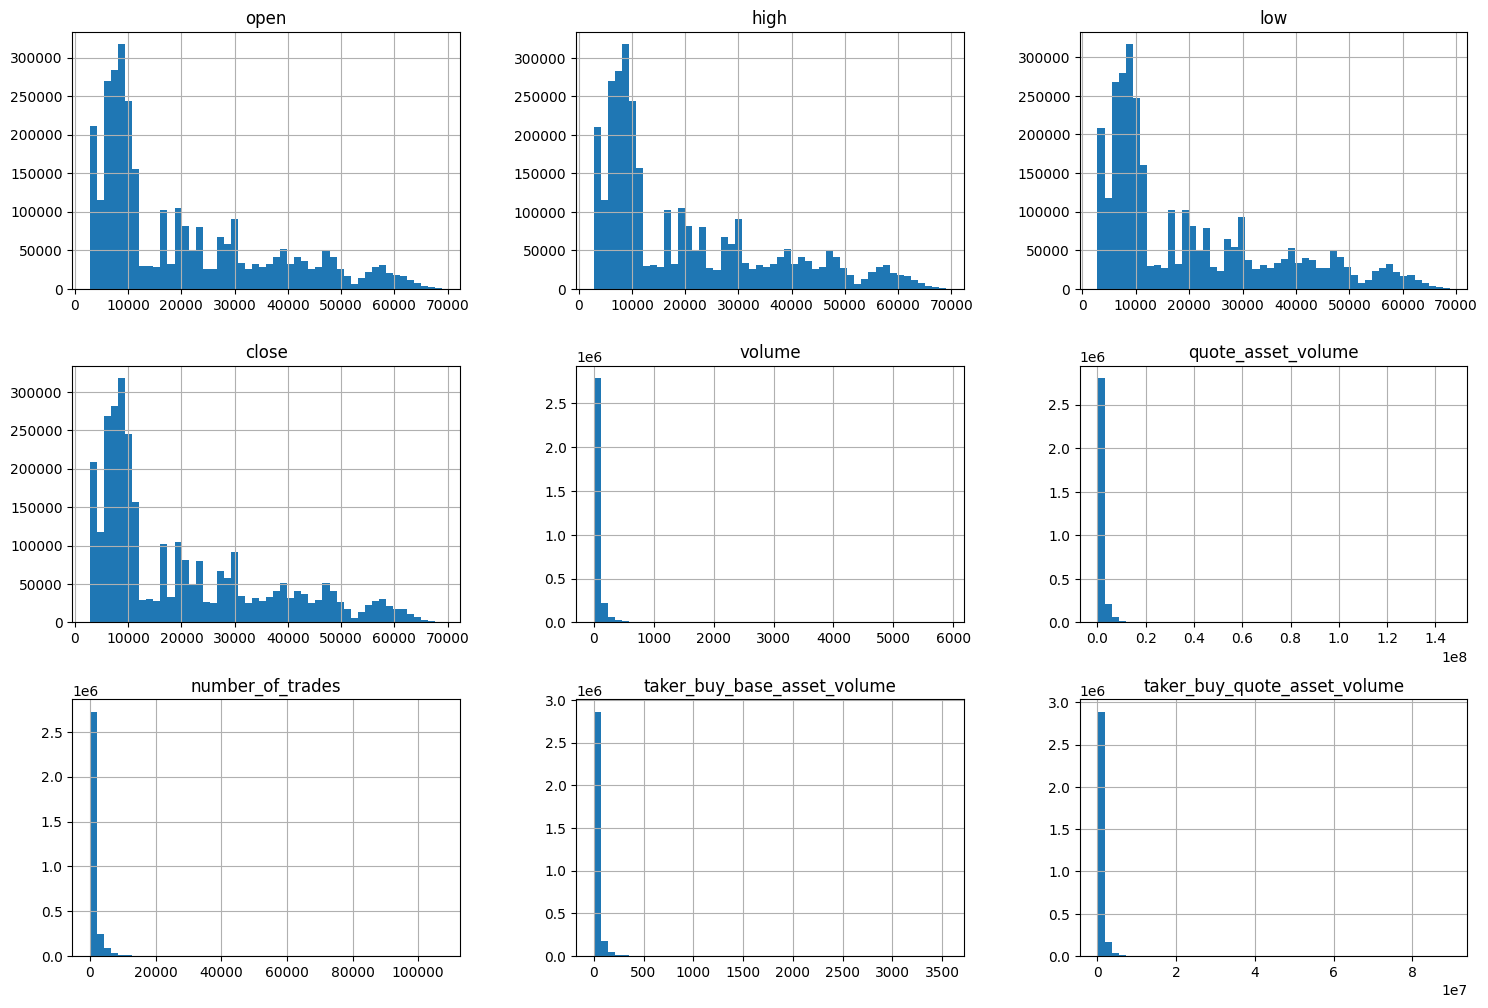

+-------+--------------------+--------------------+-------------------+--------------------+-------------------+--------------------+--------------------+-----------------------------+------------------------------+
|       |        open        |        high        |        low        |       close        |      volume       | quote_asset_volume |  number_of_trades  | taker_buy_base_asset_volume | taker_buy_quote_asset_volume |
+-------+--------------------+--------------------+-------------------+--------------------+-------------------+--------------------+--------------------+-----------------------------+------------------------------+
| count |     3126000.0      |     3126000.0      |     3126000.0     |     3126000.0      |     3126000.0     |     3126000.0      |     3126000.0      |          3126000.0          |          3126000.0           |
| mean  | 20089.470161638223 | 20102.174211775444 | 20076.65738357677 |  20089.4622518906  | 52.90799811777576 | 1155882.3767564509 | 10

In [110]:
# Q.B.i) Visualisation
# Plotting the histogram plot for each of the features

import matplotlib.pyplot as plt
from tabulate import tabulate

bitcoin_dataframe.hist(bins=50, figsize=(18, 12))
plt.show()

# Q.B.i) Summary statistics
# To display statistics of the features in the bitcoin_dataframe

print(tabulate(bitcoin_dataframe.describe(),headers='keys', tablefmt='pretty'))

In [111]:
# Q.B.ii)Special Treatment : Start date and time of the dataframe

print(bitcoin_dataframe['timestamp'].head(800))

# It has 800 records from [2023-08-01 00:00:00] ~ [2023-08-01 13:19:00] - Which is not the entire data for the day.

0      2023-08-01 13:19:00
1      2023-08-01 13:18:00
2      2023-08-01 13:17:00
3      2023-08-01 13:16:00
4      2023-08-01 13:15:00
              ...         
795    2023-08-01 00:04:00
796    2023-08-01 00:03:00
797    2023-08-01 00:02:00
798    2023-08-01 00:01:00
799    2023-08-01 00:00:00
Name: timestamp, Length: 800, dtype: object


In [112]:
# Q.B.ii)Special Treatment : End date and time of the dataframe

print(bitcoin_dataframe['timestamp'].tail(1200))

# It has 1200 records from [2023-08-01 00:00:00] ~ [2023-08-01 13:19:00] - Which is not the entire data for the day.

3124800    2017-08-17 23:59:00
3124801    2017-08-17 23:58:00
3124802    2017-08-17 23:57:00
3124803    2017-08-17 23:56:00
3124804    2017-08-17 23:55:00
                  ...         
3125995    2017-08-17 04:04:00
3125996    2017-08-17 04:03:00
3125997    2017-08-17 04:02:00
3125998    2017-08-17 04:01:00
3125999    2017-08-17 04:00:00
Name: timestamp, Length: 1200, dtype: object


In [113]:
# Q.B.ii) Special Treatment : Removing the first 800 and last 1200 instances to have the entire data of the day

bitcoin_dataframe = bitcoin_dataframe.iloc[800:]
bitcoin_dataframe = bitcoin_dataframe.iloc[:-1200]
print(bitcoin_dataframe['timestamp'].head())
print(bitcoin_dataframe['timestamp'].tail())

# We can see that the 17th Aug 2017 and 1st Aug 2023 value gets completely truncated.
# This was a special treatment required for the ease of calculating the following technical features for trend analysis.

800    2023-07-31 23:59:00
801    2023-07-31 23:58:00
802    2023-07-31 23:57:00
803    2023-07-31 23:56:00
804    2023-07-31 23:55:00
Name: timestamp, dtype: object
3124795    2017-08-18 00:04:00
3124796    2017-08-18 00:03:00
3124797    2017-08-18 00:02:00
3124798    2017-08-18 00:01:00
3124799    2017-08-18 00:00:00
Name: timestamp, dtype: object


Introducing some Technical features beneficial for trend analysis :
1. Moving Averages (for smoothing out the price data for specified period)\
    1.a. SMA - Simple Moving Average\
    1.b. EMA - Exponential Moving Average

In [114]:
# Q.B.i) 1.a. Visualisation : Simple Moving Average - plain average

bitcoin_dataframe = bitcoin_dataframe[::-1]

# Selecting time_window to be a 30 day window to ensure a smoother curve for trend analysis
time_window = 30 * 1440

# Calculating the moving average
bitcoin_dataframe['SMA_30'] = bitcoin_dataframe['close'].rolling(window=time_window, min_periods=1).mean()

# The dataframe has been reversed once before and after the calculation because we want the moving average 
# to be calculated from day 1 which is at the bottom of the list
bitcoin_dataframe = bitcoin_dataframe[::-1]


In [115]:
# Q.B.i) Visualisation : 1.b Exponential Moving Average - gives more weights to the recent data

bitcoin_dataframe = bitcoin_dataframe[::-1]

# Selecting time_window to be a 30 day window to ensure a smoother curve for trend analysis
time_window = 30 * 1440

# Calculating the moving average
bitcoin_dataframe['EMA_30'] = bitcoin_dataframe['close'].ewm(span=time_window, adjust=False).mean()

# The dataframe has been reversed once before and after the calculation because we want the moving average 
# to be calculated from day 1 which is at the bottom of the list
bitcoin_dataframe = bitcoin_dataframe[::-1]


print(tabulate(bitcoin_dataframe[['SMA_30', 'EMA_30']].describe(),headers='keys', tablefmt='pretty'))

+-------+--------------------+--------------------+
|       |       SMA_30       |       EMA_30       |
+-------+--------------------+--------------------+
| count |     3124000.0      |     3124000.0      |
| mean  | 19916.265209539662 | 19917.998229773304 |
|  std  | 15944.437706001296 | 15855.763151655923 |
|  min  | 3525.885946064815  | 3544.4946338465397 |
|  25%  | 7631.721274363425  |  7671.71641413882  |
|  50%  | 11268.046416319445 | 11211.344223595333 |
|  75%  | 28954.239976678244 | 29325.364489756008 |
|  max  |  62775.8432537037  | 61800.03639231762  |
+-------+--------------------+--------------------+


In [116]:
# Q.B.i) Visualisation : Typically, RSI is calculated over a 14-day period
n = 14 * 1440 

bitcoin_dataframe['Change'] = bitcoin_dataframe['close'].diff()
bitcoin_dataframe['Gain'] = bitcoin_dataframe['Change'].apply(lambda x: x if x > 0 else 0)
bitcoin_dataframe['Loss'] = bitcoin_dataframe['Change'].apply(lambda x: abs(x) if x < 0 else 0)

avg_gain = bitcoin_dataframe['Gain'][:n].mean()
avg_loss = bitcoin_dataframe['Loss'][:n].mean()

for i in range(n, len(bitcoin_dataframe)):
    avg_gain = ((n - 1) * avg_gain + bitcoin_dataframe['Gain'][i]) / n
    avg_loss = ((n - 1) * avg_loss + bitcoin_dataframe['Loss'][i]) / n
    
    rs = avg_gain / avg_loss
    bitcoin_dataframe.at[i, 'RSI'] = 100 - (100 / (1 + rs))

In [117]:
# Q.B.i) Visualisation : Stats of the newly created columns

print(tabulate(bitcoin_dataframe[['Change', 'Gain', 'Loss', 'RSI']].describe(),headers='keys', tablefmt='pretty'))

+-------+-----------------------+--------------------+-------------------+---------------------+
|       |        Change         |        Gain        |       Loss        |         RSI         |
+-------+-----------------------+--------------------+-------------------+---------------------+
| count |       3123999.0       |     3124000.0      |     3124000.0     |      3103840.0      |
| mean  | -0.007985652364165291 | 6.815155832266328  | 6.823141482074259 | 49.947582383135746  |
|  std  |  28.633801741248593   | 18.978854406106773 | 19.14930417630647 | 0.39106847291197344 |
|  min  |  -2115.779999999999   |        0.0         |        0.0        |  48.8210361852927   |
|  25%  |  -5.169999999998254   |        0.0         |        0.0        | 49.659354829902306  |
|  50%  |          0.0          |        0.0         |        0.0        |  49.94975154337985  |
|  75%  |   5.180000000000291   | 5.180000000000291  | 5.169999999998254 | 50.212636430446324  |
|  max  |  2129.5699999999997 

In [118]:
# Printing number of missing entries for each feature

missing_entries = bitcoin_dataframe.isnull().sum()
print(missing_entries)

timestamp                           0
open                                0
high                                0
low                                 0
close                               0
volume                              0
quote_asset_volume                  0
number_of_trades                    0
taker_buy_base_asset_volume         0
taker_buy_quote_asset_volume        0
SMA_30                              0
EMA_30                              0
Change                              1
Gain                                0
Loss                                0
RSI                             20160
dtype: int64


In [119]:
# Q.B.ii) Special Treatment : Handling missing values 

# 1 null value in Change
bitcoin_dataframe['Change'].fillna(0, inplace=True)

# 20160 null values in RSI - because the RSI is computed after the RSI_period, 50 considered to be a neutral value
bitcoin_dataframe['RSI'].fillna(50, inplace=True)

# Printing number of missing entries for each feature

missing_entries = bitcoin_dataframe.isnull().sum()
print(missing_entries)

# No other missing values

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
SMA_30                          0
EMA_30                          0
Change                          0
Gain                            0
Loss                            0
RSI                             0
dtype: int64


In [120]:
# Q.B.i) Visualisation : Define MACD parameters
short_ema_period = 12 * 1440
long_ema_period = 26 * 1440
signal_ema_period = 9 * 1440

# Calculate short-term EMA (12-day-period EMA)
bitcoin_dataframe['ShortEMA'] = bitcoin_dataframe['close'].ewm(span=short_ema_period).mean()

# Calculate long-term EMA (26-day-period EMA)
bitcoin_dataframe['LongEMA'] = bitcoin_dataframe['close'].ewm(span=long_ema_period).mean()

# Calculate MACD Line
bitcoin_dataframe['MACD'] = bitcoin_dataframe['ShortEMA'] - bitcoin_dataframe['LongEMA']

# Calculate Signal Line (9-day-period EMA of MACD)
bitcoin_dataframe['SignalLine'] = bitcoin_dataframe['MACD'].ewm(span=signal_ema_period).mean()

# Calculate MACD Histogram
bitcoin_dataframe['MACD_Histogram'] = bitcoin_dataframe['MACD'] - bitcoin_dataframe['SignalLine']

# Print the MACD indicators stats
print(tabulate(bitcoin_dataframe[['ShortEMA', 'LongEMA', 'MACD', 'SignalLine', 'MACD_Histogram']].describe(),headers='keys', tablefmt='pretty'))

+-------+--------------------+--------------------+--------------------+--------------------+----------------------+
|       |      ShortEMA      |      LongEMA       |        MACD        |     SignalLine     |    MACD_Histogram    |
+-------+--------------------+--------------------+--------------------+--------------------+----------------------+
| count |     3124000.0      |     3124000.0      |     3124000.0      |     3124000.0      |      3124000.0       |
| mean  |  20163.0054706336  | 20244.784460321574 | -81.77898968798034 | -81.70767396375616 | -0.07131572422419441 |
|  std  | 15957.412059934904 | 15825.887300603268 | 1156.7593933860944 | 1100.2888500377535 |   356.99910999412    |
|  min  | 3456.3559952011615 | 3547.043729367048  | -4677.530890994865 | -4278.033351212421 | -1629.2125064611182  |
|  25%  | 7694.200347617796  | 7854.339587787815  | -458.575672140621  | -436.1733743503173 | -110.97608951780644  |
|  50%  | 11672.681595865244 | 11585.679574065023 | -54.96656551

In [121]:
# Printing number of missing entries for each feature

missing_entries = bitcoin_dataframe.isnull().sum()
print(missing_entries)

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
SMA_30                          0
EMA_30                          0
Change                          0
Gain                            0
Loss                            0
RSI                             0
ShortEMA                        0
LongEMA                         0
MACD                            0
SignalLine                      0
MACD_Histogram                  0
dtype: int64


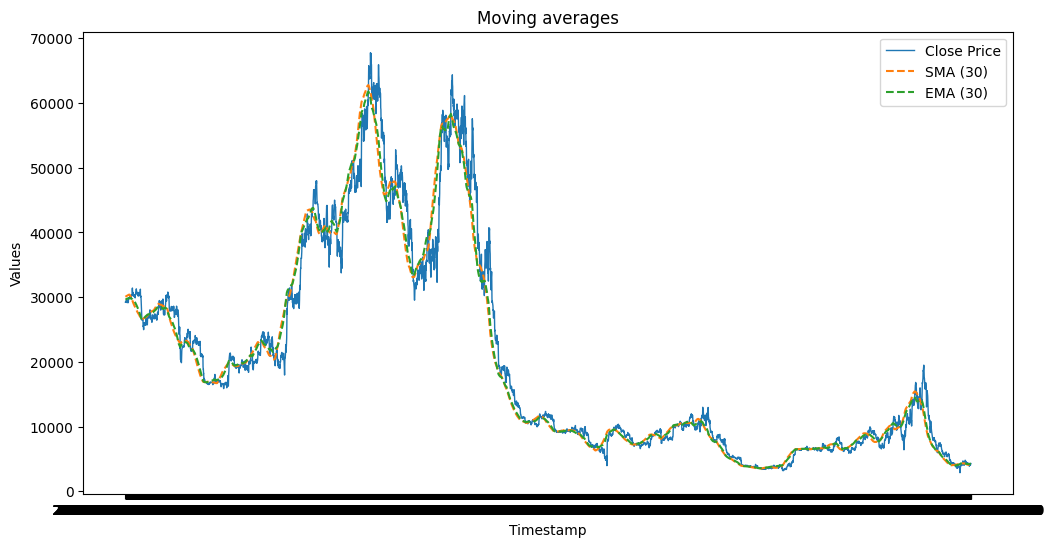

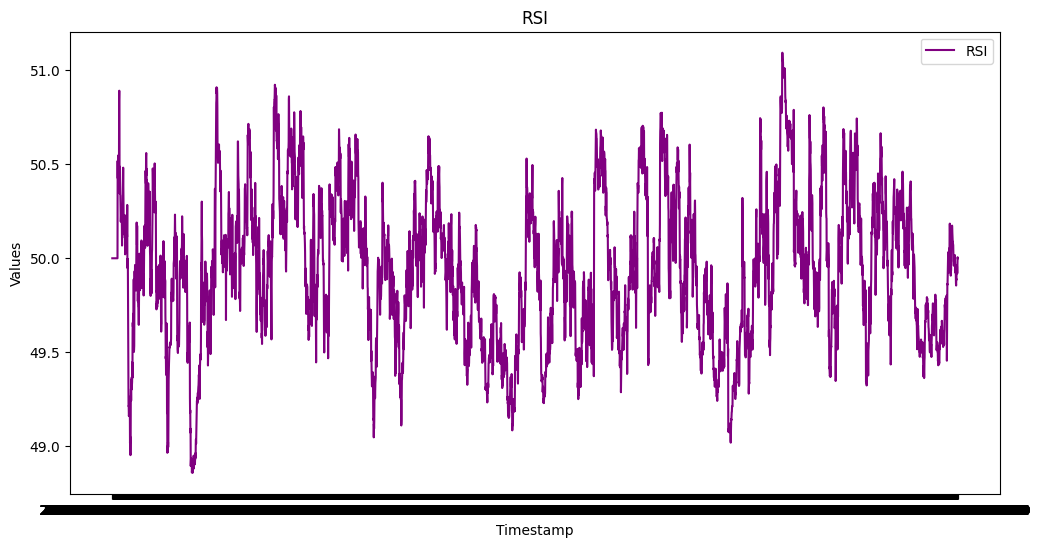

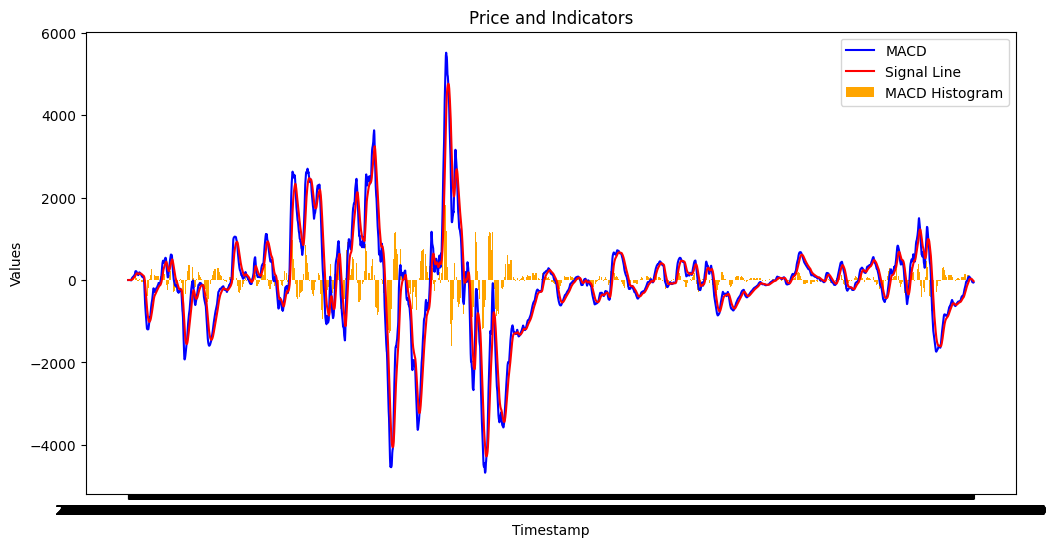

In [122]:
# Observation :
# After the following trial and error methods - decided on the following values
# Q.B.i) Visualising 
#   1. around 3000000 instances - the kernel crashed after running for the entire night
#   2. around 5000 instances - ran within 10 secs
#   3. around 50000 instances - ran for 20 mins 

# Visualisation
sampled_bitcoin_dataframe = bitcoin_dataframe.iloc[::600]
# Plot Close Price
plt.figure(figsize=(12, 6))
plt.plot(sampled_bitcoin_dataframe['timestamp'], sampled_bitcoin_dataframe['close'], label='Close Price', linewidth=1)

# Plot SMA
plt.plot(sampled_bitcoin_dataframe['timestamp'], sampled_bitcoin_dataframe['SMA_30'], label='SMA (30)', linestyle='--')

# Plot EMA
plt.plot(sampled_bitcoin_dataframe['timestamp'], sampled_bitcoin_dataframe['EMA_30'], label='EMA (30)', linestyle='--')

plt.title('Moving averages')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()

# Plot RSI
plt.figure(figsize=(12, 6))
plt.plot(sampled_bitcoin_dataframe['timestamp'][:n], sampled_bitcoin_dataframe['RSI'][:n], label='RSI', color='purple')

plt.title('RSI')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()

# Plot MACD and Signal Line
plt.figure(figsize=(12, 6))
plt.plot(sampled_bitcoin_dataframe['timestamp'], sampled_bitcoin_dataframe['MACD'], label='MACD', color='blue')
plt.plot(sampled_bitcoin_dataframe['timestamp'], sampled_bitcoin_dataframe['SignalLine'], label='Signal Line', color='red')
plt.bar(sampled_bitcoin_dataframe['timestamp'], sampled_bitcoin_dataframe['MACD_Histogram'], label='MACD Histogram', color='orange')

# Customize plot appearance
plt.title('Price and Indicators')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()

# Show the plots
plt.show()

In [123]:
# Q.B.ii) Special Treatment : Converting into datetime object
bitcoin_dataframe['timestamp'] = pd.to_datetime(bitcoin_dataframe['timestamp'])

# Timestamp needs to be converted to a usable format - 
bitcoin_dataframe['year'] = bitcoin_dataframe['timestamp'].dt.year
bitcoin_dataframe['month'] = bitcoin_dataframe['timestamp'].dt.month
bitcoin_dataframe['day'] = bitcoin_dataframe['timestamp'].dt.day
bitcoin_dataframe['hour'] = bitcoin_dataframe['timestamp'].dt.hour
bitcoin_dataframe['minute'] = bitcoin_dataframe['timestamp'].dt.minute

# Printing
columns_to_drop = ['timestamp']
bitcoin_dataframe = bitcoin_dataframe.drop(columns=columns_to_drop)
tabulate_table(bitcoin_dataframe.head())


,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,SMA_30,EMA_30,Change,Gain,Loss,RSI,ShortEMA,LongEMA,MACD,SignalLine,MACD_Histogram,year,month,day,hour,minute
800,29232.26,29232.26,29232.25,29232.25,8.96878,2.621777e+05,166,8.57045,250533.622717,30069.650431,29629.563173,0.00,0.00,0.0,50.0,29232.250000,29232.250000,0.000000,0.000000e+00,0.000000e+00,2023,7,31,23,59
801,29232.25,29232.26,29232.25,29232.25,3.22980,9.441433e+04,146,0.70827,20704.332790,30069.681766,29629.581568,0.00,0.00,0.0,50.0,29232.250000,29232.250000,0.000000,0.000000e+00,0.000000e+00,2023,7,31,23,58
802,29232.30,29232.31,29232.25,29232.25,35.75711,1.045263e+06,230,0.46917,13714.920683,30069.713100,29629.599963,0.00,0.00,0.0,50.0,29232.250000,29232.250000,0.000000,0.000000e+00,0.000000e+00,2023,7,31,23,57
803,29232.32,29232.32,29232.30,29232.30,14.10363,4.122817e+05,152,4.06437,118810.924028,30069.744435,29629.618359,0.05,0.05,0.0,50.0,29232.262502,29232.262501,0.000001,2.922182e-07,8.763842e-07,2023,7,31,23,56
804,29238.57,29238.57,29232.31,29232.31,7.49108,2.190084e+05,290,0.53350,15595.658288,30069.775840,29629.636754,0.01,0.01,0.0,50.0,29232.272004,29232.272002,0.000002,6.576923e-07,1.461332e-06,2023,7,31,23,55


close                           1.000000
high                            0.999999
low                             0.999999
open                            0.999998
ShortEMA                        0.994495
LongEMA                         0.987390
EMA_30                          0.985215
SMA_30                          0.981164
year                            0.627059
quote_asset_volume              0.303302
Gain                            0.293748
taker_buy_quote_asset_volume    0.292228
Loss                            0.289714
SignalLine                      0.227870
MACD                            0.210279
number_of_trades                0.208210
RSI                             0.178741
volume                          0.059110
taker_buy_base_asset_volume     0.054903
Change                          0.000949
minute                          0.000012
hour                           -0.000057
day                            -0.012511
MACD_Histogram                 -0.020952
month           

<Axes: >

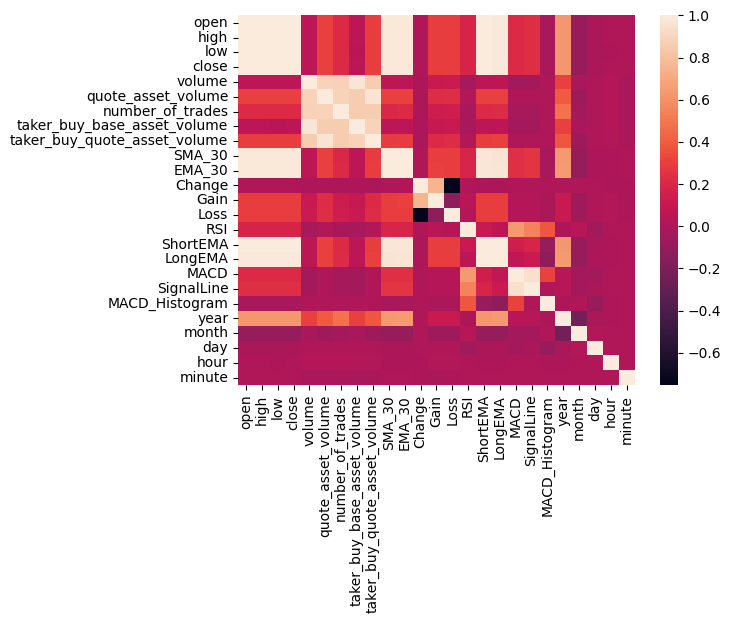

In [124]:
# Q.C.i) Calculating PCC (Pearson's Correlation Coefficient) table for all features
import seaborn as sns

pcc_table = bitcoin_dataframe.corr()
sorted_pcc_table = pcc_table["close"].sort_values(ascending=False)
print(sorted_pcc_table)

# Displaying the heatmap of the table
sns.heatmap(pcc_table)

In [125]:
# Dropping the columns that are no longer required to visualise

columns_to_drop = ['ShortEMA', 'LongEMA', 'Gain', 'Loss', 'SignalLine', 'Change', 'MACD_Histogram']
bitcoin_dataframe = bitcoin_dataframe.drop(columns=columns_to_drop)

print(tabulate(bitcoin_dataframe.describe(),headers='keys', tablefmt='pretty'))


+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------------------+------------------------------+--------------------+--------------------+---------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+
|       |        open        |        high        |        low         |       close        |       volume       | quote_asset_volume |  number_of_trades  | taker_buy_base_asset_volume | taker_buy_quote_asset_volume |       SMA_30       |       EMA_30       |         RSI         |        MACD        |        year        |       month       |        day         |        hour        |       minute       |
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------------------+

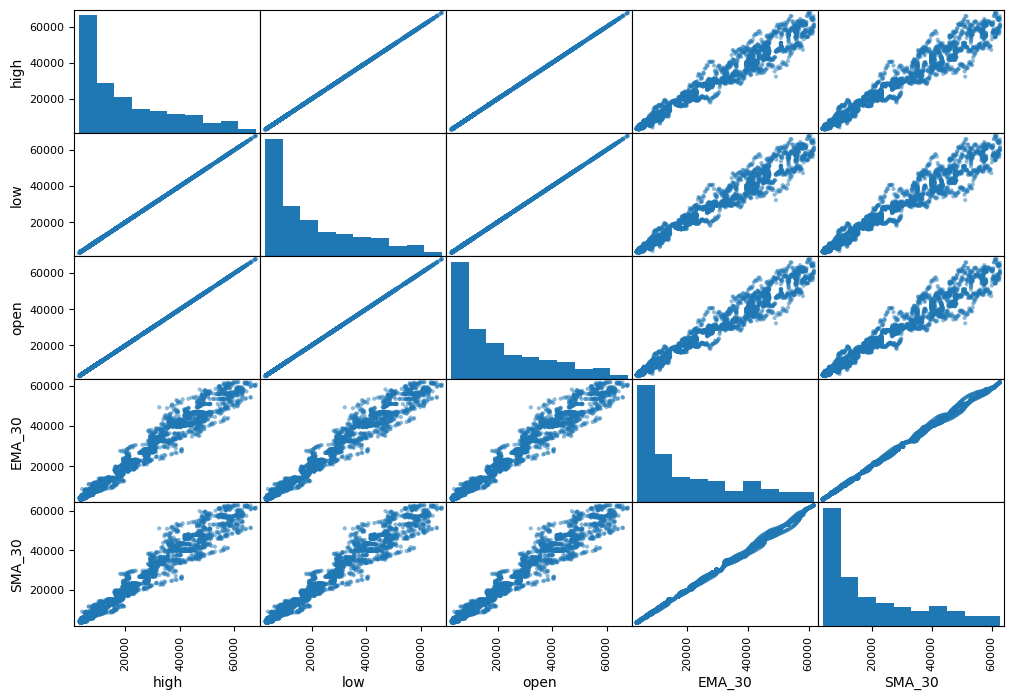

" \n# Q.C.iii) Discussions - FEATURE SELECTION\n\nFrom the PCC table - we see that the features that most closely correlate with the target variable - 'close' in our case are :\n1. high\n2. low\n3. open\n4. EMA_30\n5. SMA_30\n\nHence the above features would be used for further analysis\nIn addition to these we will also consider the following features - month, day, hour, minute and quote_asset_volume.\nThis is because time is a very important factor when it comes to predicting anything in the fianncial market and also the volume, \nquote_asset_volume having the highest correlation coefficient was a pick\n"

In [126]:
# Q.C.ii) Scatter plot of the features selected

from pandas.plotting import scatter_matrix

# TO DO : Not able to plot the year
attributes = ["high", "low", "open", "EMA_30", "SMA_30"]
scatter_matrix(sampled_bitcoin_dataframe[attributes], figsize=(12, 8))
plt.show()

""" 
# Q.C.iii) Discussions - FEATURE SELECTION

From the PCC table - we see that the features that most closely correlate with the target variable - 'close' in our case are :
1. high
2. low
3. open
4. EMA_30
5. SMA_30

Hence the above features would be used for further analysis
In addition to these we will also consider the following features - month, day, hour, minute and quote_asset_volume.
This is because time is a very important factor when it comes to predicting anything in the fianncial market and also the volume, 
quote_asset_volume having the highest correlation coefficient was a pick
"""

In [127]:
interval = 1440  # 

# Select rows at equal intervals
bitcoin_dataframe = bitcoin_dataframe[::interval]

# Print the subsampled DataFrame
print(bitcoin_dataframe.describe())

               open          high           low         close       volume  \
count   2170.000000   2170.000000   2170.000000   2170.000000  2170.000000   
mean   20094.484203  20105.983747  20082.524991  20094.032180    50.096584   
std    16057.787779  16066.697662  16049.414528  16058.207601    88.403012   
min     3246.100000   3247.370000   3245.540000   3246.750000     0.000000   
25%     7658.942500   7665.712500   7653.957500   7658.415000    10.173645   
50%    11700.470000  11703.015000  11700.325000  11701.795000    22.480463   
75%    29901.665000  29902.102500  29890.452500  29893.590000    52.916965   
max    67528.020000  67534.570000  67476.860000  67500.000000  1258.623460   

       quote_asset_volume  number_of_trades  taker_buy_base_asset_volume  \
count        2.170000e+03       2170.000000                  2170.000000   
mean         1.015538e+06        914.955760                    24.565562   
std          1.894339e+06       1543.830271                    44.905

In [128]:
# Q.E.Part1.ii) For SGD : Feature scaling

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_features = scaler.fit_transform(bitcoin_dataframe[["high", "low", "open", "EMA_30", "year"]])

# Replace the original features with the scaled features in your DataFrame
bitcoin_dataframe[["high", "low", "open", "EMA_30", "year"]] = scaled_features

In [129]:
# Q.D.i) Correctly splitting data as test and train

from sklearn.model_selection import train_test_split

#  Q.C.iii) Feature Selection 
X = bitcoin_dataframe[["high", "low", "open", "EMA_30", "year"]]  # Features
y = bitcoin_dataframe['close']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Q.D.ii) Verify representativeness of the test data
print("\nX Training data shape:", X_train.shape)
print("X Testing data shape:", X_test.shape)

print("\nY Training data shape:", y_train.shape)
print("Y Testing data shape:", y_test.shape)


X Training data shape: (1736, 5)
X Testing data shape: (434, 5)

Y Training data shape: (1736,)
Y Testing data shape: (434,)


In [130]:
# Q.D.ii) Verify if the test portion representative of the entire data set

test_mean = y_test.mean()
train_mean = y_train.mean()
total_mean = bitcoin_dataframe['close'].mean()
print(total_mean, train_mean, test_mean)

# The means are closely similar, hence representative of the original dataframe

20094.0321797235 20137.647263824885 19919.57184331797


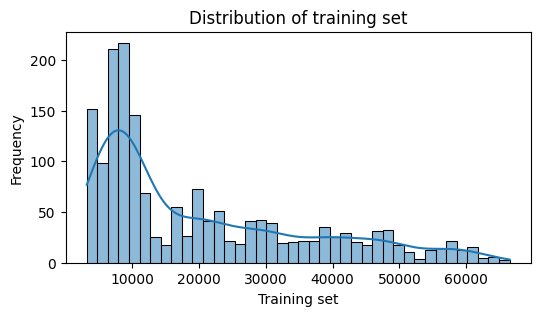

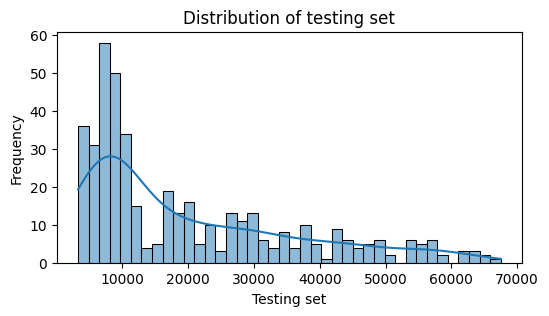

In [131]:
# Q.D.ii) Show Distribution of Training and Test set data

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.histplot(y_train, kde=True, bins = 40)
plt.title(f'Distribution of training set')
plt.xlabel('Training set')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(y_test, kde=True, bins = 40)
plt.title(f'Distribution of testing set')
plt.xlabel('Testing set')
plt.ylabel('Frequency')
plt.show()

# The distribution is closely similar, hence verified that the test and training set are representative of the original dataframe

# Linear Regression

MSE using Closed-Form Solution: 139.54016493682553


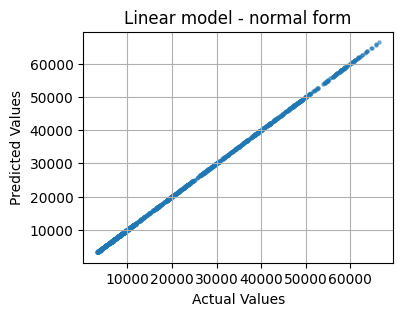

In [132]:
# Q.E.Part1) Linear model using K-fold cross-validation (k = 4) for Normal form

import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error

# Define the number of folds for cross-validation
n_splits = 4
linear_regression_mse = []

# Create a KFold cross-validator
kf = KFold(n_splits=n_splits)

y_val_true_list = []
y_val_pred_list = []

# Perform cross-validation
for train_idx, val_idx in kf.split(X_train):

    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Q.E.Part1.i) Normal Form : Fit the Linear Regression model using the closed-form solution
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(X_train_fold, y_train_fold)

    # Q.G.Part1.i) Prediction on the Test Labels - using linear model for normal form
    # Make predictions on the validation set
    y_val_pred = linear_regression_model.predict(X_val_fold)

    # Calculate the MSE for this fold
    lin_reg_mse = mean_squared_error(y_val_fold, y_val_pred)
    y_val_true_list.extend(y_val_fold)
    y_val_pred_list.extend(y_val_pred)
    linear_regression_mse.append(lin_reg_mse)

linear_regression_mse_mean = np.mean(linear_regression_mse)
print("MSE using Closed-Form Solution:", linear_regression_mse_mean)

# Q.G.Part1.ii) Reporting the evaluation metric -> Linear model - normal form
plt.figure(figsize=(4, 3))
plt.scatter(y_val_true_list, y_val_pred_list, alpha=0.5, s=5)  
plt.title('Linear model - normal form')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

#### INFERENCE : LINEAR MODEL - NORMAL FORM
The linear model using normal form is pretty good estimator. \
The plot is almost like y = x indicating the values are predicted accurately.

MSE using Stochastic Gradient Descent: 270.6463484557748


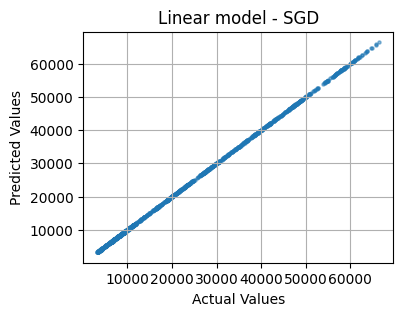

In [133]:
# Q.E.Part1.ii) Linear model using K-fold cross-validation (k = 4) for SGD

dict = []
sgd_mse = []

# Create a KFold cross-validator
kf = KFold(n_splits=n_splits)
sgd_predictions_list = []
y_val_true_list = []

# Perform cross-validation
for train_idx, val_idx in kf.split(X_train):

    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    #Training with SGD (Stochastic Gradient Descent)
    sgd_model=SGDRegressor(learning_rate='adaptive', max_iter=100000, tol=1e-3, penalty='l2', eta0=0.0001)
    sgd_model.fit(X_train_fold, y_train_fold.ravel())

    # Q.G.Part1.i) Prediction on the Test Labels - using linear model for SGD
    sgd_predictions = sgd_model.predict(X_val_fold)

    # Calculate MSE for this fold
    s_mse = mean_squared_error(y_val_fold, sgd_predictions)
    sgd_predictions_list.extend(sgd_predictions)
    y_val_true_list.extend(y_val_fold)
    sgd_mse.append(s_mse)

    dict.append(s_mse)
sgd_mse_mean = np.mean(sgd_mse)
print("MSE using Stochastic Gradient Descent:", sgd_mse_mean)

# Q.G.Part1.ii) Reporting the evaluation metric -> Linear model - SGD
plt.figure(figsize=(4, 3))
plt.scatter(y_val_true_list, sgd_predictions_list, alpha=0.5, s=5)  
plt.title('Linear model - SGD')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

#### INFERENCE : LINEAR MODEL - SGD
The linear model using SGD is pretty good estimator. \
The plot is almost like y = x indicating the values are predicted correctly.

╒═════════════════╤═════════════╤═════════════╤═══════════════════╕
│   Learning Rate │   Lasso MSE │   Ridge MSE │   Elastic Net MSE │
╞═════════════════╪═════════════╪═════════════╪═══════════════════╡
│           0.001 │     380.418 │     181.754 │     422.196       │
├─────────────────┼─────────────┼─────────────┼───────────────────┤
│           0.01  │     380.45  │     238.414 │   16773.3         │
├─────────────────┼─────────────┼─────────────┼───────────────────┤
│           0.1   │     380.442 │     254.961 │  283402           │
├─────────────────┼─────────────┼─────────────┼───────────────────┤
│           1     │     382.105 │     789.908 │       4.03818e+06 │
╘═════════════════╧═════════════╧═════════════╧═══════════════════╛


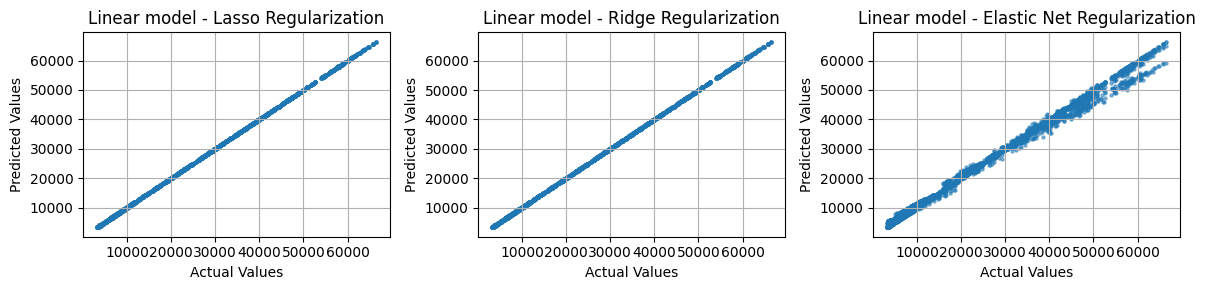

In [148]:
import copy
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from tabulate import tabulate
import matplotlib.pyplot as plt

# Lists to store MSE values
lasso_mse_list = []
ridge_mse_list = []
elastic_net_mse_list = []

# Lists to store true and predicted values for plotting
lasso_true_val_list = []
lasso_pred_val_list = []
ridge_true_val_list = []
ridge_pred_val_list = []
elastic_net_true_val_list = []
elastic_net_pred_val_list = []
learning_rate_list = []

n_splits = 4

kf = KFold(n_splits=n_splits)
learning_rates = [0.001, 0.01, 0.1, 1]

for item in learning_rates:
    lasso_mse = []
    ridge_mse = []
    elastic_net_mse = []

    for train_idx, val_idx in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Training with Lasso
        l_model = Lasso(alpha=item, max_iter=100000)
        l_model.fit(X_train_fold, y_train_fold)

        # Q.G.Part1.i) Prediction on the Test Labels - using linear model for Lasso
        # Make predictions on the validation set
        yl_val_pred = l_model.predict(X_val_fold)

        # Calculate the MSE for this fold
        l_mse = mean_squared_error(y_val_fold, yl_val_pred)
        lasso_mse.append(l_mse)
        lasso_true_val_list.extend(y_val_fold)
        lasso_pred_val_list.extend(yl_val_pred)

        # Training with Ridge
        r_model = Ridge(alpha=item, max_iter=100000)
        r_model.fit(X_train_fold, y_train_fold)

        # Q.G.Part1.i) Prediction on the Test Labels - using linear model for Ridge
        # Make predictions on the validation set
        r_yl_val_pred = r_model.predict(X_val_fold)

        # Calculate the MSE for this fold
        r_mse = mean_squared_error(y_val_fold, r_yl_val_pred)
        ridge_mse.append(r_mse)
        ridge_true_val_list.extend(y_val_fold)
        ridge_pred_val_list.extend(r_yl_val_pred)

        # Training with ElasticNet
        elastic_net = ElasticNet(alpha=item, l1_ratio=0.5, max_iter=100000)
        elastic_net.fit(X_train_fold, y_train_fold)

        # Q.G.Part1.i) Prediction on the Test Labels - using linear model for Elastic Net
        # Make predictions on the test data
        y_pred = elastic_net.predict(X_val_fold)

        # Calculate the MSE for this fold
        e_mse = mean_squared_error(y_val_fold, y_pred)
        elastic_net_mse.append(e_mse)
        elastic_net_true_val_list.extend(y_val_fold)
        elastic_net_pred_val_list.extend(y_pred)

    # Calculate mean MSE for each model and learning rate
    lasso_mse_mean = np.mean(lasso_mse)
    ridge_mse_mean = np.mean(ridge_mse)
    elastic_net_mse_mean = np.mean(elastic_net_mse)

    # Append the mean MSE values to respective lists
    learning_rate_list.append(item)
    lasso_mse_list.append(lasso_mse_mean)
    ridge_mse_list.append(ridge_mse_mean)
    elastic_net_mse_list.append(elastic_net_mse_mean)

data = {
    'Learning Rate': learning_rate_list,
    'Lasso MSE': lasso_mse_list,
    'Ridge MSE': ridge_mse_list,
    'Elastic Net MSE': elastic_net_mse_list,
}

table = tabulate(data, headers='keys', tablefmt='fancy_grid')
table_linear_model = copy.deepcopy(table)
print(table)

# Q.G.Part1.ii) Reporting the evaluation metric -> Linear model - Lasso, Ridge and Elastic Net Regularization
plt.figure(figsize=(12, 3))  

# Linear model with Lasso Regularization
plt.subplot(131) 
plt.scatter(lasso_true_val_list, lasso_pred_val_list, alpha=0.5, s=5)  
plt.title('Linear model - Lasso Regularization')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Linear model with Ridge Regularization
plt.subplot(132)  
plt.scatter(ridge_true_val_list, ridge_pred_val_list, alpha=0.5, s=5)  
plt.title('Linear model - Ridge Regularization')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

#  Linear model with Elastic Net Regularization
plt.subplot(133)  
plt.scatter(elastic_net_true_val_list, elastic_net_pred_val_list, alpha=0.5, s=5)  
plt.title('Linear model - Elastic Net Regularization')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

plt.tight_layout()  
plt.show()


# Q.E.Part1.iv) Discuss the impact of different regularizations 

# As seen from the result below : 
# Ridge Regression performs really well and brings the MSE close to that of the Linear Regression model
# The learning rate doesnt seem to impact the Ridge and Lasso Regression majorly.
# However, the Elastic net Regression is being majorly impacted the value shoots up as the learning rate increases, seems to be diverging rather than converging.


#### INFERENCE : LINEAR MODEL - LASSO, RIDGE, ELASTIC NET REGULARIZATIONS
Ridge model has the best performance with respect to models.\
Learning rate of 0.001 has the best performance across all the models \
The learning rate doesnt seem to impact the Ridge and Lasso Regression majorly.\
However, the Elastic net Regression is being majorly impacted the value shoots up as the learning rate increases, seems to be diverging rather than converging.


In [135]:
# Q.E.Part3.i) Tuning the hyperparameters - Learning rate and batch size
# The SGD Regressor model does not support the batch size as a hyperparameter so implemented that manually to check for values.

from numpy.ma.core import mean
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

batch_sizes = [1, 10, 100, 1000]
learning_rates = [0.001, 0.01, 0.1, 1]

# Dictionaries to store results
total_train_loss = {}
total_val_loss = {}
train_loss={}
val_loss={}

# Iterate through different batch sizes and learning rates
for b in batch_sizes:
    for lt in learning_rates:
        # Initialize SGDRegressor
        sgd_model = SGDRegressor(max_iter=1, tol=None, eta0=lt, learning_rate="constant", penalty=None, random_state=42)

        # Lists to store training and validation loss
        training_loss = []
        validation_loss = []

        # Training loop
        for epoch in range(100):  # 100 epochs
            for i in range(0, len(X_train), b):
                X_batch = X_train[i:i+b]
                y_batch = y_train[i:i+b]
                sgd_model.partial_fit(X_batch, y_batch)

            # Compute training loss
            y_train_pred = sgd_model.predict(X_train)
            train_loss[(b, lt, epoch)] = mean_squared_error(y_train, y_train_pred)
            training_loss.append(train_loss[(b, lt, epoch)])

            # Q.G.Part1.i) Prediction on the Test Labels - using linear model for SGD
            # Compute validation loss
            y_val_pred = sgd_model.predict(X_test)
            val_loss[(b, lt, epoch)] = mean_squared_error(y_test, y_val_pred)
            validation_loss.append(val_loss[(b, lt, epoch)])

        # Store results for this combination of hyperparameters
        total_train_loss[(b, lt)] = mean(training_loss)
        total_val_loss[(b, lt)] = mean(validation_loss)

min_key, min_value = min(total_train_loss.items(), key=lambda x: x[1])
print(f"Least training loss for values: {min_key}, Value is: {min_value}")
min_key, min_value = min(total_val_loss.items(), key=lambda x: x[1])
print(f"Least Validation loss for values: {min_key}, Value is: {min_value}")

Least training loss for values: (100, 0.1), Value is: 273.72432185444904
Least Validation loss for values: (100, 0.1), Value is: 314.7361530544253


### Q.F.Part3.ii) Description of models :

For linear regression the following models have been formulated:\
Cross validation has been done for all the models with folds = 4.\

1. Linear Regression using normal form
2. SGD for Polynomial Regression 
    2.1. Learning rate = 'adaptive'
    2.2. Penalty = 'l2'

The following has been done for different batch sizes = [1, 10, 100, 1000] and learning rates = [0.001, 0.01, 0.1, 1]
3. Ridge on SGD 
4. Lasso on SGD
5. Elastic Net on SGD

#### INFERENCE: BEST SGD WITHOUT ANY REGULARIZATIONS, TUNING THE HYPERPARAMETERS
Across the batch_sizes = [1, 10, 100, 1000] and learning_rates = [0.001, 0.01, 0.1, 1]. \
The best SGD model is with batch size 100 and learning rate = 0.1.


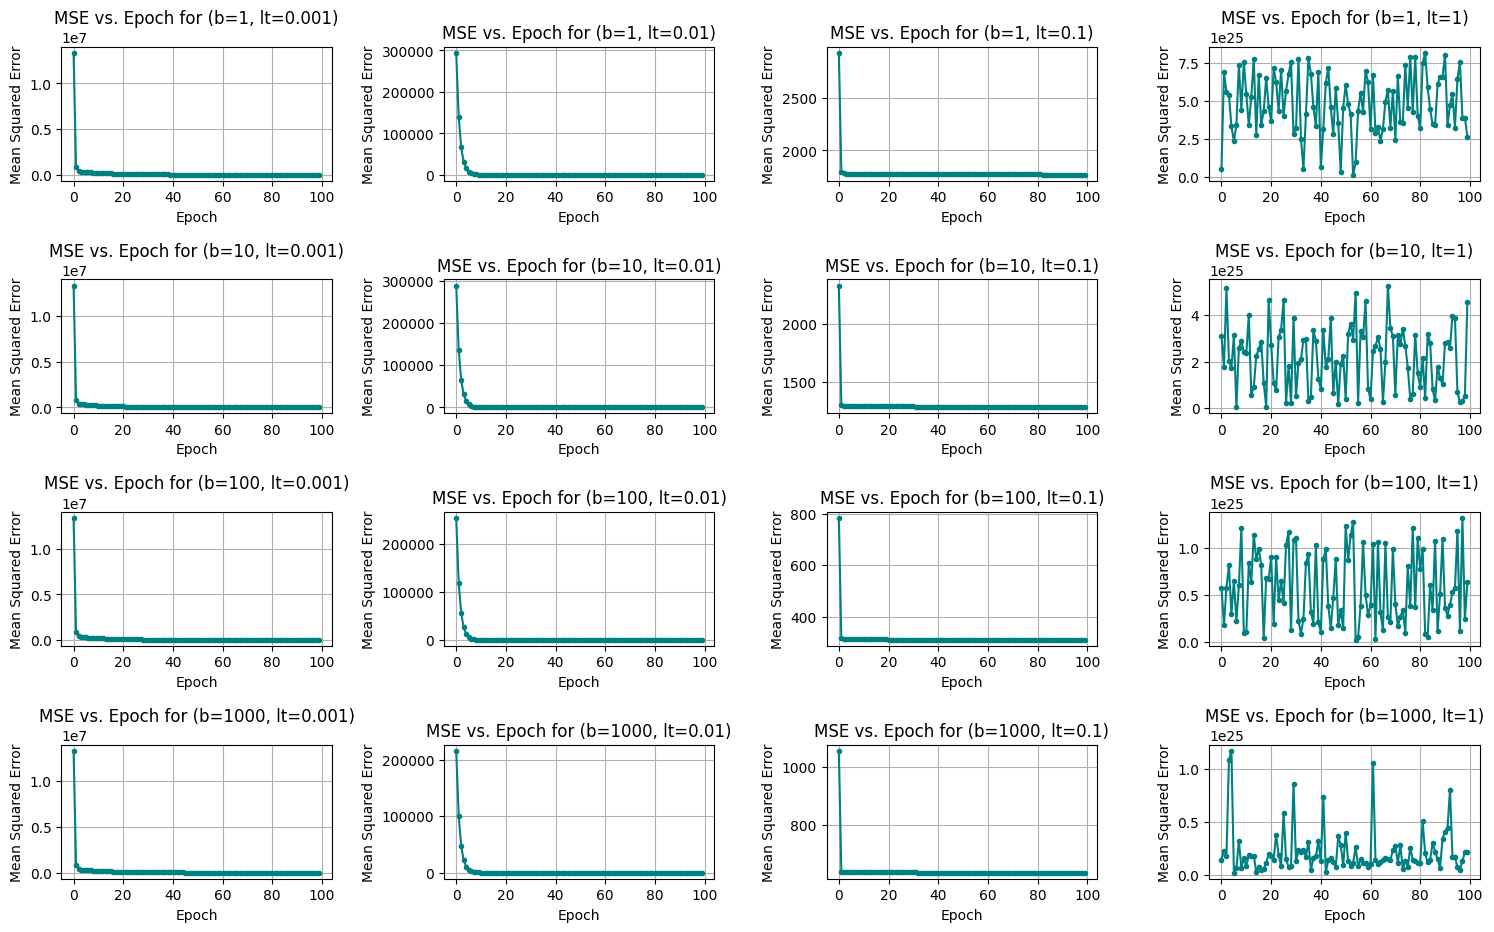

In [136]:
# Q.G.Part1.ii) Reporting the evaluation metric -> The validation loss vs epoch for each batch size and learning rate - for linear model using SGD

import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 4, figsize=(16, 10))
fig.tight_layout(pad=5.0)

for i, b in enumerate(batch_sizes):
    for j, lt in enumerate(learning_rates):
        ax = axs[i, j]
        ax.set_title(f'MSE vs. Epoch for (b={b}, lt={lt})')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Mean Squared Error')
        
        filtered_data = {key: mse for key, mse in val_loss.items() if key[:2] == (b, lt)}
        
        # Sort the data by epoch
        sorted_data = sorted(filtered_data.items(), key=lambda x: x[0][2])
        
        # Extract epochs and corresponding MSE values
        epochs, mses = zip(*[(key[2], mse) for key, mse in sorted_data])
        ax.plot(epochs, mses, marker='o', linestyle='-', markersize=3, color='#008080')
        ax.grid(True)

plt.show()

##### The above graphs are visual representation of how the MSE varies wrt each iteration for each comination of (batch size, learning rate) for linear regression - SGD

# Polynomial Regression

1
Best alpha for lasso: 0.01
Best alpha for Ridge: 0.001
Best alpha for Elastic Net: 0.001


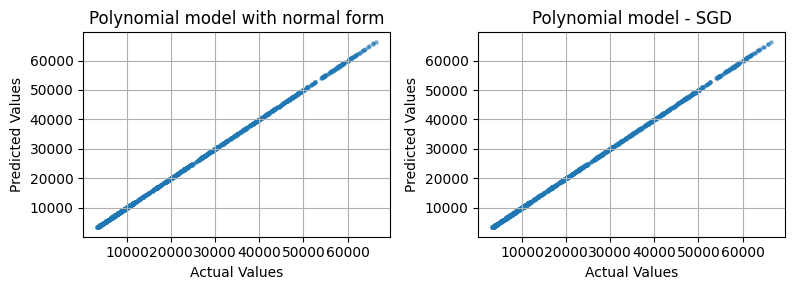

In [137]:
import numpy as np
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
import warnings

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Create a polynomial regression pipeline
polynomial_regression = Pipeline([
    ('poly_features', poly_features),  # Adjust the degree as needed
    ('linear_regression', LinearRegression())
])
degrees = [1, 2]
param_grid = {'poly_features__degree': degrees}
poly_reg_cv = GridSearchCV(polynomial_regression, param_grid, cv=5, scoring='neg_mean_squared_error')
poly_reg_cv.fit(X_train, y_train)
best_degree = poly_reg_cv.best_params_['poly_features__degree']
print(best_degree)

X_poly = poly_features.fit_transform(X_train)
param_grid={'alpha':learning_rates}

# Lasso Regression for Polynomial Regression of degree 2
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv=4, scoring='neg_mean_squared_error')
lasso_cv.fit(X_poly, y_train)

best_alpha_lasso = lasso_cv.best_params_['alpha']
best_lasso_model = lasso_cv.best_estimator_

# Ridge Regression for Polynomial Regression of degree 2
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=4, scoring='neg_mean_squared_error')
ridge_cv.fit(X_poly, y_train)

best_alpha_ridge = ridge_cv.best_params_['alpha']
best_ridge_model = ridge_cv.best_estimator_

# Elastic Net Regression for Polynomial Regression of degree 2
elastic_net = ElasticNet()
elastic_net_cv = GridSearchCV(elastic_net, param_grid, cv=4, scoring='neg_mean_squared_error')
elastic_net_cv.fit(X_poly, y_train)

best_alpha_elastic_net = elastic_net_cv.best_params_['alpha']
best_elastic_net_model = elastic_net_cv.best_estimator_

print("Best alpha for lasso:",best_alpha_lasso)
print("Best alpha for Ridge:",best_alpha_ridge)
print("Best alpha for Elastic Net:",best_alpha_elastic_net)

lt=[0.001,0.01,0.1,1]
#FInding best alphas using K-Fold Cross Validation while expanding and comparing with other values

# Define the number of folds for cross-validation
n_splits = 4
# Initialize lists to store MSE values for each fold
p_mse_scores = []
l_0_001_mse_scores = []
l_0_01_mse_scores = []
l_0_1_mse_scores = []
l_1_mse_scores = []
sgd_mse_scores = []
r_0_001_mse_scores = []
r_0_01_mse_scores = []
r_0_1_mse_scores = []
r_1_mse_scores = []
e_0_001_mse_scores = []
e_0_01_mse_scores = []
e_0_1_mse_scores = []
e_1_mse_scores = []

poly_true_val_list = []
poly_pred_val_list = []

sgd_true_val_list = []
sgd_pred_val_list = []

# Create a KFold cross-validator
kf = KFold(n_splits=n_splits)

# Perform cross-validation
for train_idx, val_idx in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Q.F.Part1.i) Polynomial model using K-fold cross-validation (k = 4) for Normal form
    X_train_poly = poly_features.fit_transform(X_train_fold)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train_fold) 
    
    # Make predictions on the validation set
    X_val_poly = poly_features.transform(X_val_fold)

    # Q.G.Part1.i) Prediction on the Test Labels - using polynomial model for normal form
    yp_val_pred = lin_reg.predict(X_val_poly)
    
    # Calculate the MSE for this fold
    p_mse = mean_squared_error(y_val_fold, yp_val_pred)
    poly_true_val_list.extend(y_val_fold)
    poly_pred_val_list.extend(yp_val_pred)
    p_mse_scores.append(p_mse)

    # Q.F.Part1.ii) Polynomial model using K-fold cross-validation (k = 4) for SGD
    #Training with SGD (Stochastic Gradient Descent)
    sgd_model=SGDRegressor(learning_rate='adaptive', max_iter=100000, tol=1e-3, penalty='l2', eta0=0.0001)
    sgd_model.fit(X_train_poly, y_train_fold.ravel())

    # Q.G.Part1.i) Prediction on the Test Labels - using polynomial model for SGD
    sgd_predictions = sgd_model.predict(X_val_poly)

    # Calculate MSE for this fold
    sgd_mse = mean_squared_error(y_val_fold, sgd_predictions)
    sgd_true_val_list.extend(y_val_fold)
    sgd_pred_val_list.extend(sgd_predictions)
    sgd_mse_scores.append(sgd_mse)

    # Q.E.Part2) Regularisation using Lasso, Ridge and Elastic Net using different learning rate.
    for item in lt:
      # Training with Lasso
      l_model = Lasso(alpha=item,max_iter=100000)
      l_model.fit(X_train_poly, y_train_fold)

      # Q.G.Part1.i) Prediction on the Test Labels - using polynomial model for Lasso
      # Make predictions on the validation set
      yl_val_pred = l_model.predict(X_val_poly)

      # Calculate the MSE for this fold
      l_mse = mean_squared_error(y_val_fold, yl_val_pred)

      # Training with Ridge
      r_model = Ridge(alpha=item,max_iter=100000)
      r_model.fit(X_train_fold, y_train_fold)

      # Q.G.Part1.i) Prediction on the Test Labels - using polynomial model for Ridge
      # Make predictions on the validation set
      r_yl_val_pred = r_model.predict(X_val_fold)
      # Calculate the MSE for this fold
      r_mse = mean_squared_error(y_val_fold, r_yl_val_pred)

      #Training with ElasticNet
      elastic_net = ElasticNet(alpha=item, l1_ratio=0.5,max_iter=100000)
      elastic_net.fit(X_train_poly, y_train_fold)

      # Q.G.Part1.i) Prediction on the Test Labels - using polynomial model for Elastic Net
      # Make predictions on the test data
      y_pred = elastic_net.predict(X_val_poly)
      # Calculate the MSE for this fold
      e_mse = mean_squared_error(y_val_fold, y_pred)
      
      if item==0.001:
        e_0_001_mse_scores.append(e_mse)
        r_0_001_mse_scores.append(r_mse)
        l_0_001_mse_scores.append(l_mse)
      elif item==0.01:
        e_0_01_mse_scores.append(e_mse)
        r_0_01_mse_scores.append(r_mse)
        l_0_01_mse_scores.append(l_mse)
      elif item==0.1:
        e_0_1_mse_scores.append(e_mse)
        r_0_1_mse_scores.append(r_mse)
        l_0_1_mse_scores.append(l_mse)
      else:
        e_1_mse_scores.append(e_mse)
        r_1_mse_scores.append(r_mse)
        l_1_mse_scores.append(l_mse)

# Calculate the mean MSE across all folds
p_mean_mse = np.mean(p_mse_scores)
sgd_mean_mse = np.mean(sgd_mse_scores)
l_0_001_mse_mean = np.mean(l_0_001_mse_scores)
l_0_01_mse_mean = np.mean(l_0_01_mse_scores)
l_0_1_mse_mean = np.mean(l_0_1_mse_scores)
l_1_mse_mean = np.mean(l_1_mse_scores)
r_0_001_mse_mean = np.mean(r_0_001_mse_scores)
r_0_01_mse_mean= np.mean(r_0_01_mse_scores)
r_0_1_mse_mean = np.mean(r_0_1_mse_scores)
r_1_mse_mean = np.mean(r_1_mse_scores)
e_0_001_mse_mean = np.mean(e_0_001_mse_scores)
e_0_01_mse_mean = np.mean(e_0_01_mse_scores)
e_0_1_mse_mean = np.mean(e_0_1_mse_scores)
e_1_mse_mean = np.mean(e_1_mse_scores)

l_values=[l_0_001_mse_mean,l_0_01_mse_mean,l_0_1_mse_mean,l_1_mse_mean]
r_values=[r_0_001_mse_mean,r_0_01_mse_mean,r_0_1_mse_mean,r_1_mse_mean]
e_values=[e_0_001_mse_mean,e_0_01_mse_mean,e_0_1_mse_mean,e_1_mse_mean]

# Q.G.Part1.ii) Reporting the evaluation metric -> Polynomial model - Normal form and SGD
plt.figure(figsize=(12, 3))  

# Polynomial model with normal form
plt.subplot(131) 
plt.scatter(poly_true_val_list, poly_pred_val_list, alpha=0.5, s=5)  
plt.title('Polynomial model with normal form')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Plynomial model with SGD
plt.subplot(132)  
plt.scatter(sgd_true_val_list, sgd_pred_val_list, alpha=0.5, s=5)  
plt.title('Polynomial model - SGD')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

plt.tight_layout()  
plt.show()

### Q.F.Part3.ii) Description of models :

For polynomial regression the following models have been formulated:\
Cross validation has been done for all the models with folds = 4.\

1. Polynomial Regression using feature transform
2. SGD for Polynomial Regression 
    2.1. Learning rate = 'adaptive'
    2.2. Penalty = 'l2'

The following has been done for different batch sizes = [1, 10, 100, 1000] and learning rates = [0.001, 0.01, 0.1, 1]
3. Ridge 
4. Lasso
5. Elastic Net

##### INFERNCE : POLYNOMIAL MODEL - NORMAL FORM AND SGD
Here in the output the 1st line 1 signifies the best degree for modelling the data.\
The best alphas for each regularization is displayed as above.\
The graphs shows pretty accurate performance of predicting.

In [138]:
import copy
from tabulate import tabulate

# Create a list of data to be displayed in the table
data = [["Polynomial Regression", "SGD", "Lasso", "", "", "", "Ridge", "", "", "", "Elastic Net", "", "", ""],
    ["Alpha", "", "", "0.001", "0.01", "0.1", "1", "0.001", "0.01", "0.1", "1", "0.001", "0.01", "0.1", "1"],
    ["Mean MSE", p_mean_mse, sgd_mean_mse, l_values[0], l_values[1], l_values[2], l_values[3],
     r_values[0], r_values[1], r_values[2], r_values[3],
     e_values[0], e_values[1], e_values[2], e_values[3]],
]


table = tabulate(data, tablefmt="fancy_grid", headers="firstrow")
table_polynomial_model = copy.deepcopy(table)
print(table)

╒══════════╤═════════════════════════╤═══════════════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═══════════════╤══════════╤══════════╤═════════════╕
│          │ Polynomial Regression   │ SGD               │   Lasso │         │         │         │   Ridge │         │         │         │   Elastic Net │          │          │             │
╞══════════╪═════════════════════════╪═══════════════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═══════════════╪══════════╪══════════╪═════════════╡
│ Alpha    │                         │                   │   0.001 │   0.01  │   0.1   │   1     │   0.001 │   0.01  │   0.1   │   1     │         0.001 │     0.01 │      0.1 │ 1           │
├──────────┼─────────────────────────┼───────────────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼───────────────┼──────────┼──────────┼─────────────┤
│ Mean MSE │ 161.26513070269897      │ 564.57

##### INFERENCE : POLYNOMIAL MODEL SUMMARY

Here the evaluation metric being MSE, we evaluate the performance across all models, regularizations and hyperparameters.
1. The best performance is that of the polynomial regressor with MSE = 161.265
2. Among the regularizations Ridge performs the best with MSE = 181.754 for the alpha value of 0.001.
3. We see that as we increase the learning rate the MSE increases. 
4. Elastic Net with l1_ratio(0.5) - 50% Ridge and 50% Lasso performs the worst.

In [139]:
from numpy.ma.core import mean
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

batch_sizes = [1, 10, 100, 1000]
learning_rates = [0.001, 0.01, 0.1, 1]

# Dictionaries to store results
total_train_loss = {}
total_val_loss = {}
train_loss={}
val_loss={}
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


# Iterate through different batch sizes and learning rates
for b in batch_sizes:
    for lt in learning_rates:
        # Initialize SGDRegressor
        sgd_model = SGDRegressor(max_iter=1, tol=None, eta0=lt, learning_rate="constant", penalty=None, random_state=42)

        # Lists to store training and validation loss
        training_loss = []
        validation_loss = []

        for epoch in range(100):
            for i in range(0, len(X_train_poly), b):
                X_batch = X_train_poly[i:i+b]
                y_batch = y_train[i:i+b]
                sgd_model.partial_fit(X_batch, y_batch.ravel())

            # Computing training loss
            y_train_pred = sgd_model.predict(X_train_poly)
            train_loss[(b, lt, epoch)] = mean_squared_error(y_train, y_train_pred)
            training_loss.append(train_loss[(b, lt, epoch)])

            # Computing validation loss
            # Q.G.Part1.i) Prediction on the Test Labels - using polynomial model for SGD
            y_test_pred = sgd_model.predict(X_test_poly)
            val_loss[(b, lt, epoch)] = mean_squared_error(y_test, y_test_pred)
            validation_loss.append(val_loss[(b, lt, epoch)])

        # Storing results for this combination of hyperparameters
        total_train_loss[(b, lt)] = mean(training_loss)
        total_val_loss[(b, lt)] = mean(validation_loss)

# Q.G.Part1.ii) Reporting the evaluation metric
min_key, min_value = min(total_train_loss.items(), key=lambda x: x[1])
print(f"Least training loss for values: {min_key}, Value is: {min_value}")
min_key, min_value = min(total_val_loss.items(), key=lambda x: x[1])
print(f"Least Validation loss for values: {min_key}, Value is: {min_value}")

Least training loss for values: (100, 0.01), Value is: 22082.946374053387
Least Validation loss for values: (100, 0.01), Value is: 23602.874209394646


##### INFERENCE : POLYNOMIAL MODEL - SGD - NO REGULARIZATIONS - TUNING HYPERPARAMETERS

Across the batch_sizes = [1, 10, 100, 1000] and learning_rates = [0.001, 0.01, 0.1, 1].\
We see that for an SGD model for polynomial regression, the best batch size is 100 and the learning rate is 0.01.

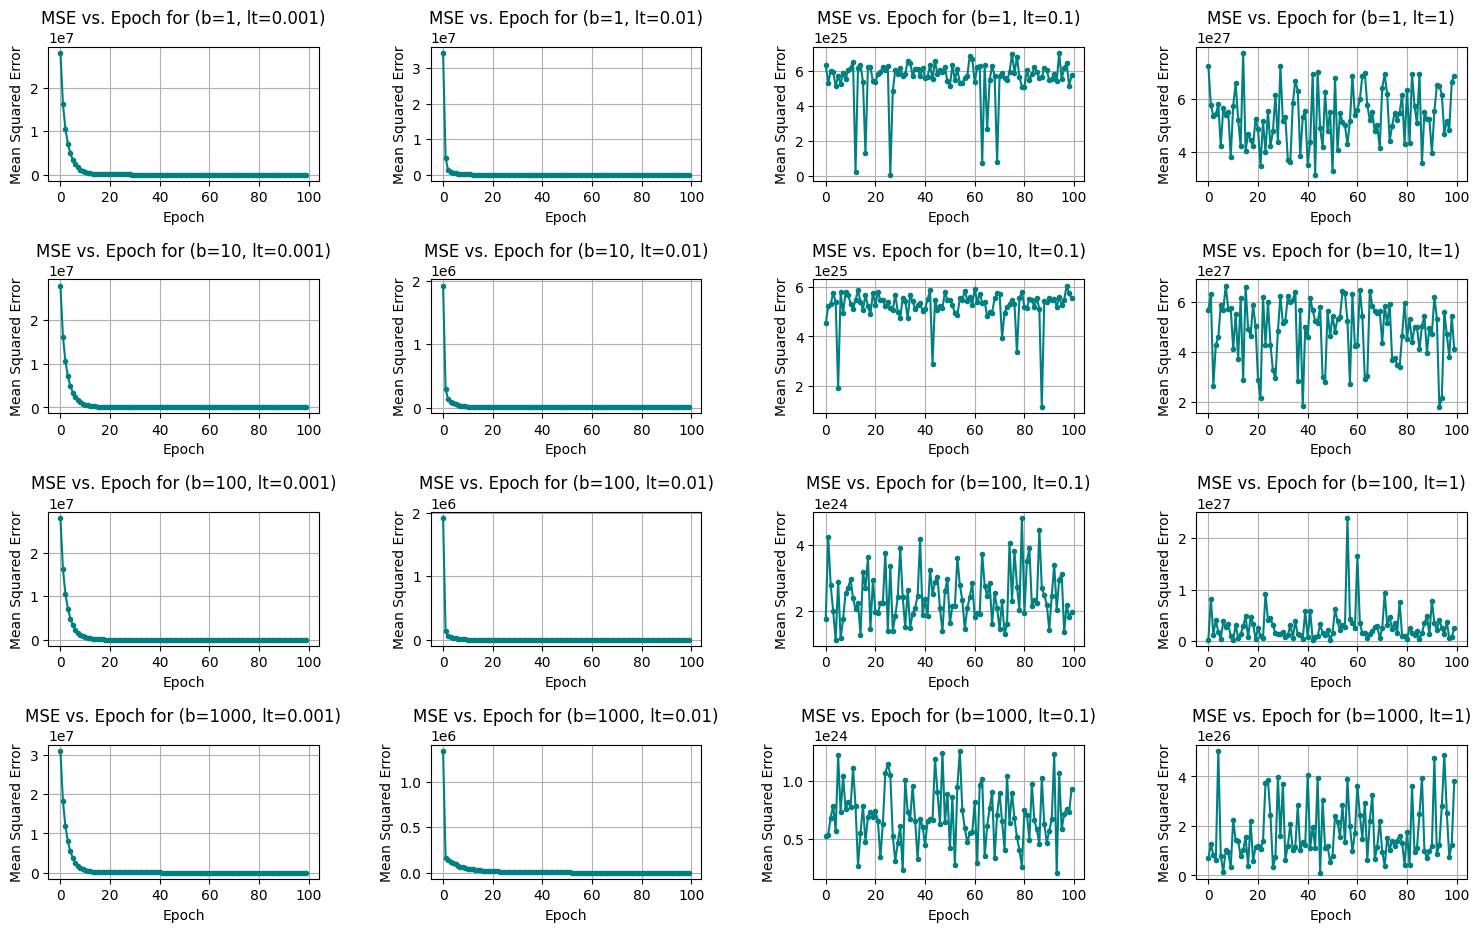

In [140]:
# Q.G.Part1.ii) Reporting the evaluation metric -> The validation loss vs epoch for each batch size and learning rate - for polynomial model using SGD

import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 4, figsize=(16, 10))
fig.tight_layout(pad=5.0)

for i, b in enumerate(batch_sizes):
    for j, lt in enumerate(learning_rates):
        ax = axs[i, j]
        ax.set_title(f'MSE vs. Epoch for (b={b}, lt={lt})')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Mean Squared Error')
            
        filtered_data = {key: mse for key, mse in val_loss.items() if key[:2] == (b, lt)}
            
        # Sort the data by epoch
        sorted_data = sorted(filtered_data.items(), key=lambda x: x[0][2])
            
        # Extract epochs and corresponding MSE values
        epochs, mses = zip(*[(key[2], mse) for key, mse in sorted_data])
        ax.plot(epochs, mses, marker='o', linestyle='-', markersize=3, color='#008080')
        ax.grid(True)

plt.show()


##### The above graphs are visual representation of how the MSE varies wrt each iteration for each comination of (batch size, learning rate) - for polynomial regression using SGD

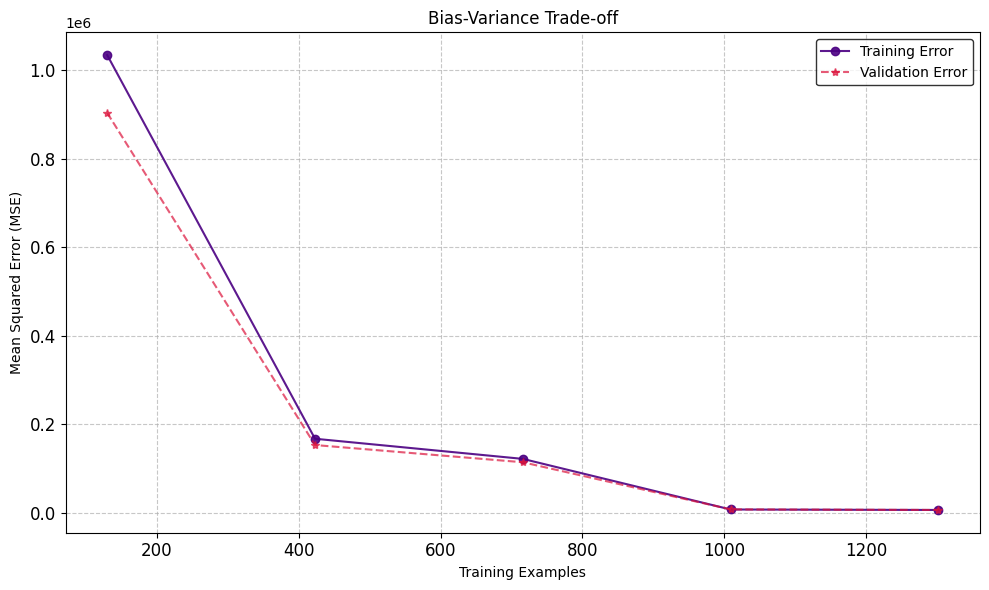

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_bias_variance_tradeoff(model, X, y, cv=4):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring='neg_mean_squared_error')

    train_mse_mean = -np.mean(train_scores, axis=1)
    test_mse_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))

    plt.plot(train_sizes, train_mse_mean, label='Training Error', linestyle='-', marker='o', color='indigo', alpha=0.9)
    plt.plot(train_sizes, test_mse_mean, label='Validation Error', linestyle='--', marker='*', color='crimson', alpha=0.7)

    plt.title('Bias-Variance Trade-off')
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error (MSE)')

    # Add a legend with a fancy box
    plt.legend(loc='best', fancybox=True, framealpha=0.8)

    # Add grid lines with a dashed style
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add a shadow to the legend frame
    legend = plt.legend()
    legend.get_frame().set_linewidth(1)
    legend.get_frame().set_edgecolor('black')

    plt.tight_layout()
    plt.show()

# Initialize SGDRegressor
sgd_model = SGDRegressor(max_iter=1, tol=None, eta0=lt, learning_rate="constant", penalty=None, random_state=42)

# Lists to store training and validation loss
training_loss = []
validation_loss = []

for epoch in range(100):
    for i in range(0, len(X_train_poly), b):
        X_batch = X_train_poly[i:i+b]
        y_batch = y_train[i:i+b]
        sgd_model.partial_fit(X_batch, y_batch.ravel())

    # Computing training loss
    y_train_pred = sgd_model.predict(X_train_poly)
    train_loss[(b, lt, epoch)] = mean_squared_error(y_train, y_train_pred)
    training_loss.append(train_loss[(b, lt, epoch)])

    # Computing validation loss
    # Q.G.Part1.i) Prediction on the Test Labels - using polynomial model for SGD
    y_test_pred = sgd_model.predict(X_test_poly)
    val_loss[(b, lt, epoch)] = mean_squared_error(y_test, y_test_pred)
    validation_loss.append(val_loss[(b, lt, epoch)])

# Storing results for this combination of hyperparameters
total_train_loss[(b, lt)] = mean(training_loss)
total_val_loss[(b, lt)] = mean(validation_loss)

plot_bias_variance_tradeoff(sgd_model, X_train, y_train)

The above graph bias vs variance is to check if the model overfits or underfits.\
It converges at the end signifying that it fits perfectly

# Q.G.Part2.i) Summarizing the result:

In [141]:
# Q.G.Part2.i) Summarizing the result:

print("Linear Model")
print("MSE using Closed-Form Solution: 139.54016493682553")
print("MSE using Stochastic Gradient Descent: 271.00486172700545")
print(table_linear_model)
print("Polynomial Model")
print(table_polynomial_model)

Linear Model
MSE using Closed-Form Solution: 139.54016493682553
MSE using Stochastic Gradient Descent: 271.00486172700545
╒═════════════════╤═════════════╤═════════════╤═══════════════════╕
│   Learning Rate │   Lasso MSE │   Ridge MSE │   Elastic Net MSE │
╞═════════════════╪═════════════╪═════════════╪═══════════════════╡
│           0.001 │     380.418 │     181.754 │     422.196       │
├─────────────────┼─────────────┼─────────────┼───────────────────┤
│           0.01  │     380.45  │     238.414 │   16773.3         │
├─────────────────┼─────────────┼─────────────┼───────────────────┤
│           0.1   │     380.442 │     254.961 │  283402           │
├─────────────────┼─────────────┼─────────────┼───────────────────┤
│           1     │     382.105 │     789.908 │       4.03818e+06 │
╘═════════════════╧═════════════╧═════════════╧═══════════════════╛
Polynomial Model
╒══════════╤═════════════════════════╤═══════════════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════

1. From the MSE - we see that the model which best fits the data is the linear regression model.
2. From the bias-variance graph we see that the training error and the validation error is coverging as more and more data is being trained, which is an expected outcome. 

# Q.G.Part2.ii) Future work:

1. These data can be further analysed and separate model can be created for analysing the trend in the increase / decrease trend. A classification problem.
2. This could be a very powerful tool for the investors trading.
3. Keeping more data into the model for increased accuracy, to achieve even further less values of MSE indicating higher performance and accuracy.
4. This data can be analysed to predict some more parameters in the bitcoin investment market.
5. Higher ML concepts such as dimentionality reduction and deep neural network techniques can be used to make the model more robust.

Taken references from 'Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems', Github repo shared by Prof Zoran, and some Kaggle pages.